In [13]:
data_path="/Users/nicholasbitter/Downloads/cell-count.csv" # replace path with path to cell-count.csv data on machine

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
from pathlib import Path 
import seaborn as sns
import statsmodels.formula.api as smf
import pymer4
from pymer4.models import Lmer
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy.stats import mannwhitneyu

### Python code 
#### 1.  Please write a python program to convert cell count in cell-count.csv to relative frequency (in percentage) of total cell count for each sample. Total cell count of each sample is the sum of cells in the five populations of that sample. Please return an output file in csv format with cell count and relative frequency of each population of each sample per line. The output file should have the following columns:

- sample: the sample id as in column sample in cell-count.csv

- total_count: total cell count of sample

- population: name of the immune cell population (e.g. b_cell, cd8_t_cell, etc.)

- count: cell count

- percentage: relative frequency in percentage

In [6]:
# reading in the data cell counts
cell_count = pd.read_csv(data_path)
cell_count['total']=cell_count[['b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte']].sum(axis=1)
cell_count['id']=[i for i in range(0,len(cell_count))]
cell_count.head(5)

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total,id
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,36000,24000,42000,6000,12000,120000,0
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,30000,22000,40000,2000,6000,100000,1
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,35000,26250,37500,10000,16250,125000,2
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,27900,17100,18000,4500,22500,90000,3
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,60000,30000,37500,4500,18000,150000,4


In [11]:
## creating precise output csv requested
output=pd.melt(cell_count, id_vars=['id' ,'project', 'subject', 'condition', 'age', 'sex', 'treatment',
       'response', 'sample', 'sample_type', 'time_from_treatment_start'], 
        value_vars=['b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte'],
        var_name='population', value_name='cell_count')
output['total_sample_count']=output.groupby(['id' ,'project', 'subject', 'condition', 'age', 'sex', 'treatment',
       'response', 'sample', 'sample_type', 'time_from_treatment_start'],dropna=False)['cell_count'].transform('sum')
output['percentage']=np.round((output['cell_count']/output['total_sample_count'])*100)
## writing to csv
output[['sample','population','total_sample_count','cell_count','percentage']].to_csv('CellCountFrequency.csv')
output.tail(20)

,id,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,population,cell_count,total_sample_count,percentage
65,14,prj2,sbj11,lung,55,F,tr1,n,s15,PBMC,0.0,nk_cell,3200,80000,4.0
66,15,prj3,sbj12,melanoma,50,F,tr1,n,s16,PBMC,0.0,nk_cell,4000,100000,4.0
67,16,prj3,sbj13,melanoma,50,M,tr1,y,s17,PBMC,0.0,nk_cell,10800,120000,9.0
68,0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,monocyte,12000,120000,10.0
69,1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,monocyte,6000,100000,6.0
70,2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,monocyte,16250,125000,13.0
71,3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,monocyte,22500,90000,25.0
72,4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,monocyte,18000,150000,12.0
73,5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,monocyte,19800,110000,18.0
74,6,prj1,sbj4,lung,50,F,tr2,y,s7,PBMC,0.0,monocyte,12350,95000,13.0


#### 2. Among patients who have treatment tr1, we are interested in comparing the differences in cell population relative frequencies of melanoma patients who respond (responders) to tr1 versus those who do not (non-responders), with the overarching aim of predicting response to treatment tr1. Response information can be found in column response, with value y for responding and value n for non-responding. Please only include PBMC (blood) samples.

##### a. For each immune cell population, please generate a boxplot of the population relative frequencies comparing responders versus non-responders.

/Users/nicholasbitter/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


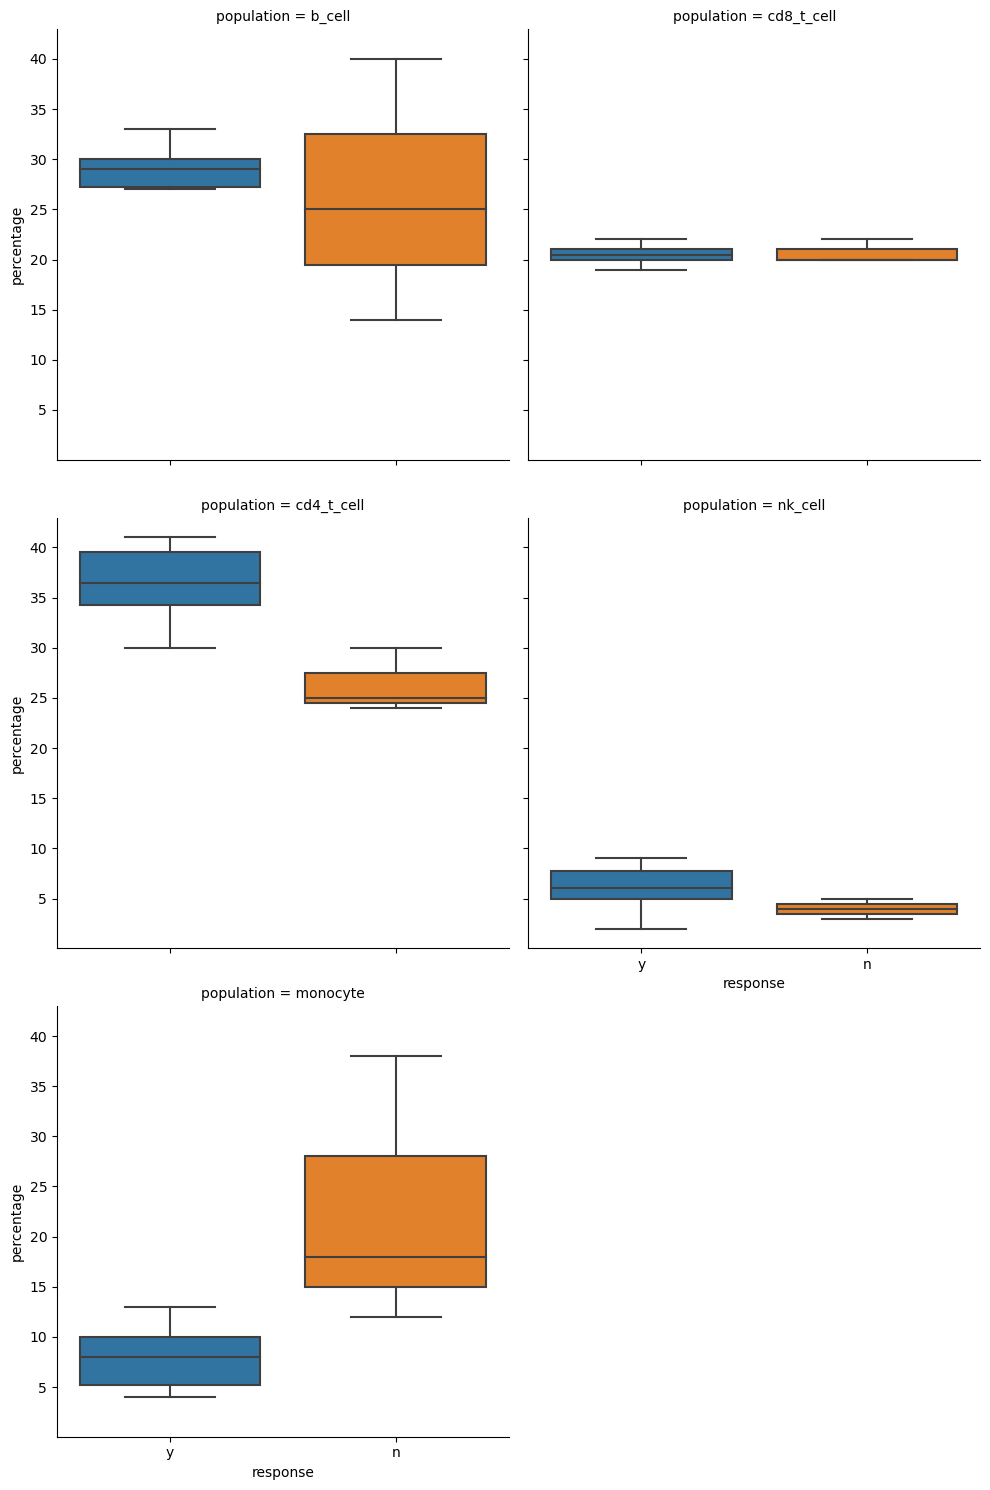

In [150]:
plot_data=output[(output['sample_type']=='PBMC') &(output['condition']=='melanoma')& (output['treatment']=='tr1')]

sns.catplot(
    data=plot_data, x='response', y='percentage',
    col='population', kind='box', col_wrap=2
)

#### b. Which cell populations are significantly different in relative frequencies between responders and non-responders? Please include statistics to support your conclusion.

- Because their are repeated measures on subjects in this data, these samples are not i.i.d..  https://www.publichealth.columbia.edu/research/population-health-methods/repeated-measures-analysis It introduces the need for statistical methods that can handle within subject correlation.  The two best methods to appropriately handle this data are Generalized Estimator Equations (GEE) and Mixed effect models. Repeated measures ANOVA is not preferred as it requires normally distributed response and balanced data.  I will attempt several methods starting with the best 

- https://pubmed.ncbi.nlm.nih.gov/20220526/ compares GEE's and Mixed effect modeling approaches and detemined GEE's produce more realistic results in their application. 
- Since the question concerns the population of cells that are significantly different between responders vs non-responders it makes the GEE or mixed effect models most appropriate. The method to determine significantly different cell populations is as follows:

    1. All the cell populations are included in the GEE model with the outcome responder as y/n. 
    2. The interperation of the log odds coeefficeints allows for determining significance. p values of the coefficients less than .05 indicate signifcance in predicting a responder vs non responder hence, the determination of significantly different populations while conidering for correlation between subjects. 
   
 - NOTE: It is unlikely given the sample size of 9 that this method will actually work. If it fails to converge or results in perfect discrimination between responders and non-responders then the model interpretation is invalid. This likely will happen with sample size of 9 in the example. 
   
   
- Furthermore this nested effect of projects can be considered too however, I will only try to consider repeated measures on subjects with the GEE because the linear mixed effect models is especially unlikely to converge fgiven the small sample size. The mixed effect model in the formulation "response  ~ b_cell+cd8_t_cell+cd4_t_cell+nk_cell+monocyte + (1|project) + (1|project:subject)" can handle both nested situations of repeated measures on subjects and within projects. The interpretation of the coefficients accounts for reapeated meassures on subjects and within batches.
   
 
 
- Alternative: The i.i.d assumption can be relaxed by averaging the repeated measures among subjects so each subject has one measurement. This makes common traditional statistics like mann whitney test, or t test statistically valid. However, it is not as good to perform this technique as the GEE or mixed effect model described above. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6072386/ I will also perform the bonferronni correction since we are applying multiple tests here 





In [154]:
## attempt with mixed effect model 
#model_data=cell_count[(cell_count['sample_type']=='PBMC')& (cell_count['condition']=='melanoma')&(cell_count['treatment']=='tr1')]
#model_data['response']=pd.factorize(model_data['response'])[0]
#model = Lmer("response  ~ b_cell+cd8_t_cell+cd4_t_cell+nk_cell+monocyte + (1|project) + (1|project:subject)",
#             data=model_data, family = 'binomial')
#print(model.fit())

### as expected it did not converge with 9 samples. 

In [158]:
model_data=cell_count[(cell_count['sample_type']=='PBMC')& (cell_count['condition']=='melanoma')&(cell_count['treatment']=='tr1')]
model = smf.gee("response ~ b_cell+cd8_t_cell+cd4_t_cell+nk_cell+monocyte",'subject',
                model_data,family=sm.families.Binomial())
result = model.fit()
print(result.summary())
## perfect seperation warning 

                                    GEE Regression Results                                   
Dep. Variable:        ['response[n]', 'response[y]']   No. Observations:                    9
Model:                                           GEE   No. clusters:                        6
Method:                                  Generalized   Min. cluster size:                   1
                                Estimating Equations   Max. cluster size:                   3
Family:                                     Binomial   Mean cluster size:                 1.5
Dependence structure:                   Independence   Num. iterations:                     5
Date:                               Mon, 29 Apr 2024   Scale:                           1.000
Covariance type:                              robust   Time:                         23:12:50
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

/Users/nicholasbitter/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/nicholasbitter/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/nicholasbitter/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/nicholasbitter/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, para

In [161]:
## averaging method
average_data=model_data[['subject','response',
             'b_cell', 'cd8_t_cell',
             'cd4_t_cell', 'nk_cell', 'monocyte']].groupby(['subject','response']).mean().reset_index()

def perform_mann_whitney(data):
    results = {}
    # Identify responder and non-responder groups
    group1 = data[data['response'] == 'y']
    group2 = data[data['response'] == 'n']
    
    for col in data.columns.drop(['response','subject']):
        # Perform the Mann-Whitney U test
        stat, p_value = mannwhitneyu(group1[col], group2[col], alternative='two-sided')
        results[col] = {'U statistic': stat, 'P-value': p_value}
    return pd.DataFrame(results).reset_index()

In [162]:
results=perform_mann_whitney(average_data)
results=results.T.iloc[1:,:]
# as expected with such a small sample size none of these are statisticlly significant with 
results.columns=['U statistic','P-value']
results['p_adjusted']=multipletests(results['P-value'], method='bonferroni')[1]

In [163]:
results ## none are significant largely because the sample size is so low in this example

,U statistic,P-value,p_adjusted
b_cell,4.0,1.0,1
cd8_t_cell,4.0,1.0,1
cd4_t_cell,8.0,0.133333,0.666667
nk_cell,8.0,0.10021,0.501048
monocyte,0.0,0.133333,0.666667
